___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" width="350px" height="180px" />

```Cristopher Corona Velasco```

```743940```

# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg</p>

### <font color= #2E9AFE> Tema: XGBoost - Regresión</font>

### Hiperparámetros

1. **eta (learning_rate)**: rango: [0,1] Es un parámetro que evita el sobreajuste. Rango ideal: 0.01 - 0.3
2. **min_child_weight** : rango: [0,∞] En la tarea de regresión, esto corresponde al número mínimo de observaciones necesarias para cada nodo. Se utiliza para controlar el sobreajuste. Rango ideal: 1-10
3. **max_depth**: rango: [0,∞] Profundidad máxima de un árbol. Aumentar este valor hará que el modelo sea más complejo y sea más probable que se sobreajuste. 0 indica que no hay límite de profundidad. Ten en cuenta que XGBoost consume memoria de forma agresiva al entrenar un árbol muy profundo. Se suele recomendar tomar valores entre 3 y 10.
4. **gamma**: rango: [0,∞] método para podar "prune" el árbol. Rango ideal: 0-5
5. **lambda (L2 - Ridge)**: Dado que el valor lambda está en el denominador de la similitud, a medida que la lambda aumenta, la similitud disminuirá y, por lo tanto, esto también disminuirá la ganancia. Esto permite una mayor poda, solo se conservan y sobreajustan las ramas con una puntuación de ganancia alta. Rango ideal: 0-10
6. **subsample:** Este parámetro define la fracción de filas de datos utilizadas para construir cada árbol. Si se establece en 1.0, cada árbol utiliza los datos completos. Rango ideal: 0.6-1.0
7. **colsample_bytree**: Muestreo de características por árbol. Rango ideal: 0.6-1.0
8. **colsample_bylevel**: Muestreo de características por nivel del árbol. Rango ideal: 0.6-1.0
9. **n_estimators**: Como XGBoost construye varios árboles para llegar a una predicción final, la cantidad de árboles que XGBoost puede crear está restringida por el número de rondas de boosting. Rango ideal: 100-1500
10. **alpha (L1 - Lasso)**: Puede reducir el peso de algunas hojas a cero y, por lo tanto, ayudar a eliminar las divisiones débiles. Es especialmente útil para datos de alta dimensión para eliminar por completo las características débiles. Rango ideal: 0-1
11. **Booster** Gbtree Gradient Boosted Decision Trees (default)
12. **Objective** Le dice a XGBoost qué tipo de problema de predicción se está resolviendo: clasificación, regresión, clasificación, etc.
13. **Eval_metric**:  Se utiliza para evaluar el rendimiento del modelo en los datos de validación después de cada iteración.
14. **Eval_set**: Utilizando este parámetro, definimos los conjuntos de datos que se utilizarán para monitorear el rendimiento del modelo después de cada iteración . Este parámetro es crucial para ayudar a identificar el ajuste insuficiente o excesivo y registrar el rendimiento del modelo durante el aprendizaje.
15. **Early_stopping_rounds** Se utiliza para evitar el sobreajuste y reducir el cálculo innecesario al detener el proceso de entrenamiento temprano si el rendimiento del modelo no mejora durante una serie de rondas.



#### Algunos tips:
- Antes de agregar la regularización, intenta controlar la complejidad mediante configuraciones de árbol más simples como max_depth, min_child_weight y gamma. Agrega lambda y alpha si ves que el modelo está sobreajustando.
- Ajuste gamma o min_child_weight, ya que la función de ambos parámetros es podar árboles. Si su modelo no se ajusta adecuadamente a pesar de la gran profundidad, verifica si gamma y min_child_weight están configurados demasiado altos, lo que limita la capacidad del modelo para capturar patrones importantes.
- Subsample y colsample_bytree. Si el sobreajuste sigue siendo un problema a pesar de la regularización, intenta reducir gradualmente estos valores, pero ajústalos uno por uno.
También puedes ajustar según las características de los datos:
    1. Conjuntos de datos con muchas variables: utiliza un colsample_bytree más bajo para reducir el ruido de variables irrelevantes.
    2. Conjuntos de datos pequeños: utilice una submuestra más alta para evitar un ajuste insuficiente.
    3. Grandes conjuntos de datos: ajuste ambos parámetros en combinación.
- Usa un bajo valor de colsample_bytree cuando uses valores altos de max_depth
- Si aumentas max_ Depth para capturar más complejidad, considera aumentar min_child_weight para contrarrestar el riesgo de sobreajuste.
- Usa early_stopping_rounds > 0 con aalto numero de high n_estimators
- Usa baja learning_rate con alto numero de n_estimators

#### Cuándo es buena idea usar XGBoost?
- Muchos datos (filas y columnas)
- Relaciones no lineales complejas
- Combinación de variables numéricas y categóricas
- Datos ruidosos o con outliers
 Necesitas alta precisión o estás en competencia (como Kaggle)
- Buscas regularización automática ya que XGBoost incluye Lasso y Ridge
- No necesitas tanta interpretabilidad

#### Cuándo NO es buena idea usar XGBoost?
- Muy pocos datos (ej. < 100)
- Modelo necesita ser 100% interpretable
- Variables 100% numéricas linealmente relacionadas
- Trabajas con imágenes, texto, audio


## Ejercicio

Veamos el famoso conjunto de datos de vivienda de California.

Es un dataset que tiene relaciones no lineales, lo que lo convierte en un excelente caso de prueba.

- Tamaño: más de 20.000 filas.
- Variable objetivo: valor medio de la vivienda.
- Desafíos: valores faltantes, relaciones no lineales y tipos de características mixtas (categóricas y continuas).

In [1]:
#pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
 
url = "https://raw.githubusercontent.com/gakudo-ai/open-datasets/main/housing.csv"
df = pd.read_csv(url)


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


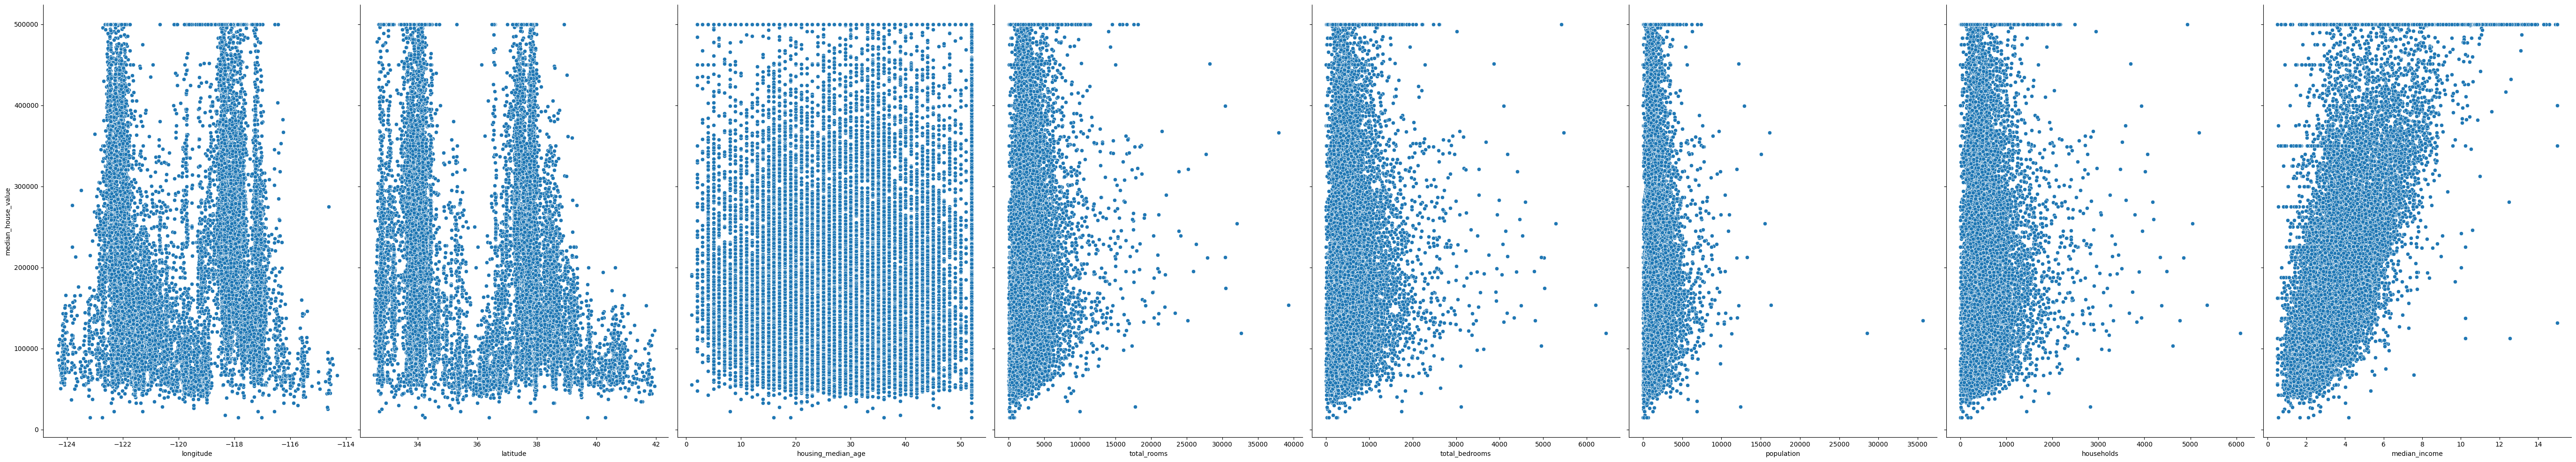

In [4]:
import seaborn as sns
# Observar la relacion entre las variables independientes y la dependiente
p = sns.pairplot(df, x_vars=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'], y_vars='median_house_value', height=10, aspect=0.7)

In [5]:
#quitamos algunas variables
#df.drop(columns=['longitude','latitude'], inplace=True)

In [6]:
#Dividimos en entrenamiento y prueba
X = df.drop(columns=["median_house_value"], errors="ignore")
y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cómo sería hacer el procesamiento con una regresión lineal? 
Tenemos:
- Valores faltantes
- Diferentes escalas
- Variables categoricas

In [7]:
#pipeline para la regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# definimos el procesamiento para variables numericas y categoricas
num_features = ['latitude','longitude',
    'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income'
]
cat_features = ['ocean_proximity']

# preprocesaminento numericas
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
])

# # preprocesaminento categoricas
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


# Entrenamos el modelo
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
print("Linear Regression RMSE:", root_mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 69753.53427451904
Linear Regression R2: 0.649014914653568


## Cómo sería hacer el procesamiento con el XGBoost?

Es más sencillo ya que no tenemos que hacer escalamiento de las variables numericas ni en encoding de las variables categoricas

In [8]:
from xgboost import XGBRegressor

# preprocesaminento numericas
X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(X_train['total_bedrooms'].mean())
X_test['total_bedrooms'] = X_test['total_bedrooms'].fillna(X_train['total_bedrooms'].mean())

# # preprocesaminento categoricas
X_train['ocean_proximity'] = X_train['ocean_proximity'].fillna(X_train['ocean_proximity'].mode()[0])
X_test['ocean_proximity'] = X_test['ocean_proximity'].fillna(X_train['ocean_proximity'].mode()[0])
#asegurarnos que las variables categoricas son del tipo category
X_train['ocean_proximity'] = X_train['ocean_proximity'].astype('category')
X_test['ocean_proximity'] = X_test['ocean_proximity'].astype('category')

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    reg_lambda=1,
    reg_alpha=0,
    enable_categorical=True
)

# Entrenamos el modelo
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost RMSE:", root_mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))

XGBoost RMSE: 49881.73148753349
XGBoost R2: 0.820510409038421


Sin tunear tanto tenemos muy buen rendimiento en el modelo :)

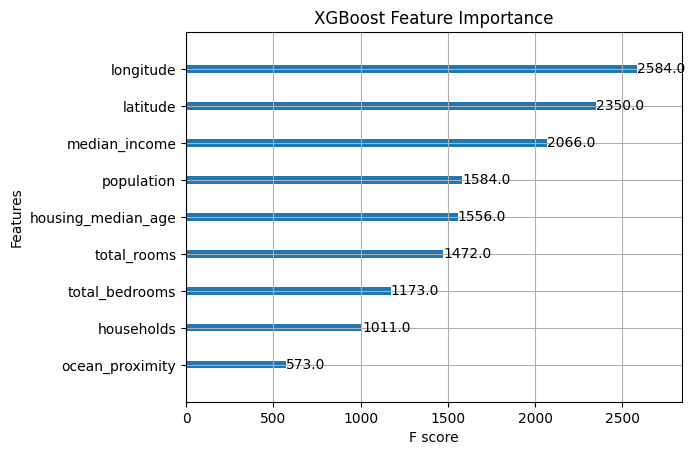

In [9]:
#importancia de las variables
xgb.plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()